In [1]:
import nibabel as nib
import numpy as np
from common import save_trk_old_style
from dipy.tracking.utils import length
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [2]:
subj = 'P8_F10'

In [2]:
def importData(ftrk,ffa):

    from nibabel import trackvis
    streams, hdr = trackvis.read(ftrk)
    streamlines = [s[0] for s in streams]

    fa_img = nib.load(ffa)
    fa = fa_img.get_data()
    affine = fa_img.get_affine()

    len(streamlines)
    
    return (streamlines,fa,affine)

In [3]:
def getStreamlineLengthInfo(streamlines):
    #streamline length
    lengths = list(length(streamlines))

    #endpoint distance
    epdistances=[]
    i=0
    for i in range(len(streamlines)):
        start = streamlines[i][0]
        end = streamlines[i][len(streamlines[i])-1]

        epdistances.append(np.linalg.norm(end-start))
    return(lengths,epdistances)

In [4]:
 def plotLengthDistance(lengths,epdistances):
    plt.figure(figsize=(10, 8))
    plt.plot(epdistances, lengths,'r+',epdistances,epdistances,'-',alpha=0.3)
    plt.xlabel('endpoint distance')
    plt.ylabel('streamline length')
    plt.legend()
    #plt.title('Title')
    #plt.savefig(dFigures+subj+'_full_stlength.jpg')
    plt.show()

In [5]:
def computeLengthDistanceRatio(lengths,epdistances):
    nplengths = np.asarray(lengths)
    npepdistances = np.asarray(epdistances)

    ratio = np.divide(nplengths,npepdistances)
    return ratio

In [26]:
def plotRatio(x,ratio):
    plt.figure(figsize=(10, 8))
    plt.plot(x, ratio,'g+',alpha=0.3)
    plt.xlabel('streamline length')
    plt.ylabel('ratio (streamline length/endpoint distance)')
    plt.legend()
    #plt.title('Title')
    ax = plt.axes()
    ax.set_ylim(top=500)
    plt.savefig(dFigures+subj+'_full_lengthdistratio.jpg')
    plt.show()

In [7]:
dFigures = 'E:/Celine/Ferret_b2n/lengthsdistances/'
subjs = ['F25_P2','F28_P2','F07_P4','F10_P8','F21_P16','F16_P32','F17_P32','F19_P32','F01_Adult','F22_Adult']
ages = [2.25,2.28,4.07,8.10,16.21,32.16,32.17,32.19,64.01,64.22]
#subjs = ['P2_F25','P8_F10','P32_F16','P64_F01']
vs = [333,300,404,989,1472,4331,5290,5322,4000,4127] #brain volumes from ophelie

#subjs = ['P2_F25','P4_F07','P8_F10','P16_F21','P32_F16','P64_F01']
#subjs = ['P2_F25','P8_F10','P32_F16','P64_F01']
#vs = [333,404,989,1472,4331,4000]

In [8]:
ls = [] #list of streamline lengths
epds = [] #list of endpoint distances
rs = [] #list of ratios (l/epd)
ls_norm = [] #list of streamline lengths normalized by the total brain volume
i=0
for subj in subjs:
    
    path = 'E:/Celine/Ferret_b2n/'+subj+'/'
    ftrk = path+'tracto_'+subj+'_rot_den_modifiedgtab_final.trk'
    #fclust = path+'2dseq_conv_FP_Tracts_DTI_xyz.trk'
    #fclust = path+'2dseq_conv_FP_Tracts_DTI-z.trk'
    ffa = path + 'tensor_fa_'+subj+'_rot_den_modifiedgtab_final.nii.gz'
    
    strm,fa,affine = importData(ftrk,ffa)
    l,epd = getStreamlineLengthInfo(strm)
    
    ls.append(l)
    epds.append(epd)
    rs.append(computeLengthDistanceRatio(l,epd))
    
    ls_norm_tmp = []
    for x in range(len(l)):
        ls_norm_tmp.append(l[x]/vs[i])
    ls_norm.append(ls_norm_tmp)
    i+=1

C:\Users\cdelettre\Anaconda2\lib\site-packages\ipykernel\__main__.py:9: DeprecationWarning: get_affine method is deprecated.
Please use the ``img.affine`` property instead.

* deprecated from version: 2.1
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 4.0
C:\Users\cdelettre\Anaconda2\lib\site-packages\ipykernel\__main__.py:5: RuntimeWarning: invalid value encountered in divide


In [30]:
#save matrices in files
np.savez(dFigures+'subjs.npz',subjs)
np.savez(dFigures+'bVolumes.npz',vs)
np.savez(dFigures+'streamlineLengths.npz',ls)
np.savez(dFigures+'endpointDistances.npz',epds)
np.savez(dFigures+'lengthToEPDistances.npz',rs)
np.savez(dFigures+'streamlineLengthsNormBVolume.npz',ls_norm)

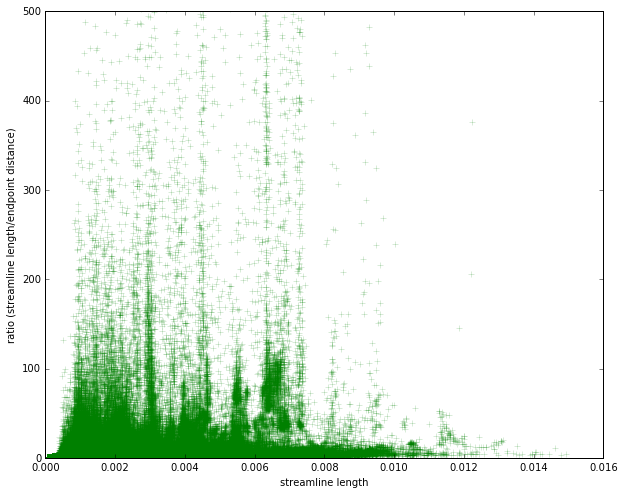

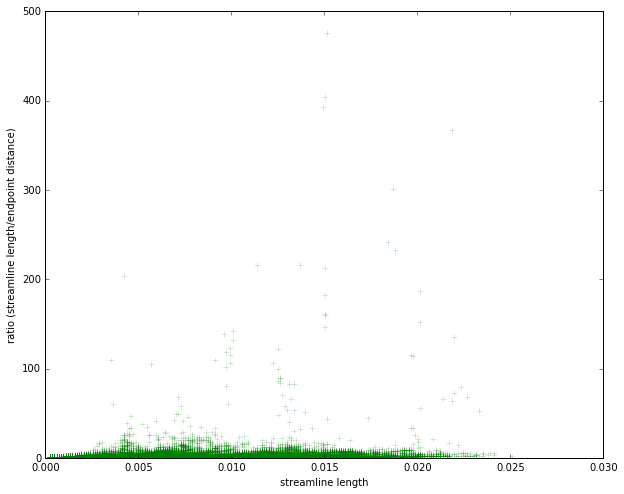

In [29]:
plotRatio(ls_norm[7],rs[7])
plotRatio(ls_norm[3],rs[3])

In [14]:
#type(np.asarray(subjs))
subjs.reverse()
print subjs

['F22_Adult', 'F01_Adult', 'F19_P32', 'F17_P32', 'F16_P32', 'F21_P16', 'F10_P8', 'F07_P4', 'F28_P2', 'F25_P2']


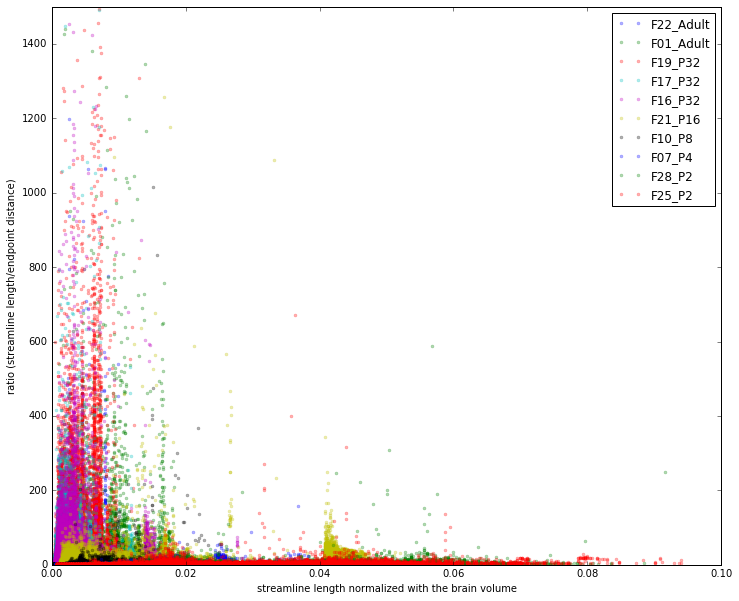

In [19]:
i= len(subjs)-1
plt.figure(figsize=(12, 10))
while i >= 0:
    plt.plot(ls_norm[i], rs[i],'.',alpha=0.3)
    i-=1
plt.xlabel('streamline length normalized with the brain volume')
plt.ylabel('ratio (streamline length/endpoint distance)')
plt.legend(subjs)
#plt.title('Title')
ax = plt.axes()
ax.set_xlim(right=0.1)
ax.set_ylim(top=1500)
plt.savefig(dFigures+'AllSubjs_full_lengthdistrationormalized.jpg')
plt.show()

In [236]:
npls_norm[0]

[0.045765762214546091,
 0.011171173405002904,
 0.0079279246630969344,
 0.011171169825144359,
 0.013333339232940215,
 0.018738740915292734,
 0.010090092638949374,
 0.034234238816453169,
 0.014774777867772558,
 0.0068468474769019507,
 0.0068468481928736597,
 0.0082882911235362556,
 0.0097297347701705613,
 0.0068468438970434057,
 0.02522522407967049,
 0.010090089775062538,
 0.023423423996200791,
 0.027387384179834131,
 0.013693696385747319,
 0.054774779815215606,
 0.013693694953803901,
 0.0093693654458444041,
 0.0072072067776241819,
 0.010090089775062538,
 0.011171172689031195,
 0.0072072082095675999,
 0.02234234537806239,
 0.029909915752239054,
 0.021981985361368448,
 0.013693692089917065,
 0.0075675696582049581,
 0.0068468446130151147,
 0.034954955985954217,
 0.016576582247072511,
 0.010090091207005956,
 0.041801799167025915,
 0.039279279050168335,
 0.038918919033474393,
 0.016216217934548319,
 0.0072072046297090549,
 0.01045044907578477,
 0.022342343946118972,
 0.027747744196528069,
 0

In [238]:
i=0
for subj in subjs:
    np.savetxt(dFigures+subj+'streamlineLengthNormalized.csv',npls_norm[i],delimiter='\t')
    i+=1

In [204]:
def computeQuartiles(x):
    npx = np.asarray(x)
    quartiles = []
    for i in range(len(subjs)):
        quartiles_tmp=[]
        quartiles_tmp=np.percentile(x[i], np.arange(0, 100, 25))
        quartiles.append([quartiles_tmp[0],quartiles_tmp[1],quartiles_tmp[2],quartiles_tmp[3],max(npls_norm[i])])
    npquartiles = np.asarray(quartiles)
    return npquartiles

In [205]:
nplsquartiles= computeQuartiles(npls_norm)

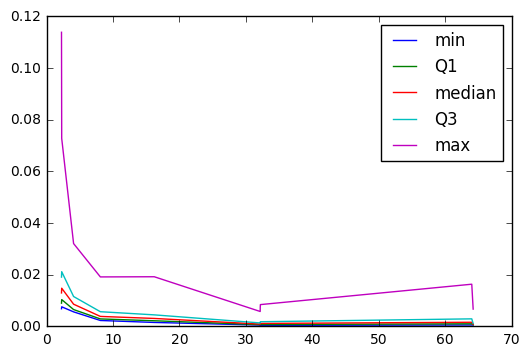

In [206]:
leg = ['min','Q1','median','Q3','max']

plt.plot(ages,nplsquartiles[:,0],ages,nplsquartiles[:,1],ages,nplsquartiles[:,2],ages,nplsquartiles[:,3],ages,nplsquartiles[:,4])
plt.legend(leg)
plt.show()

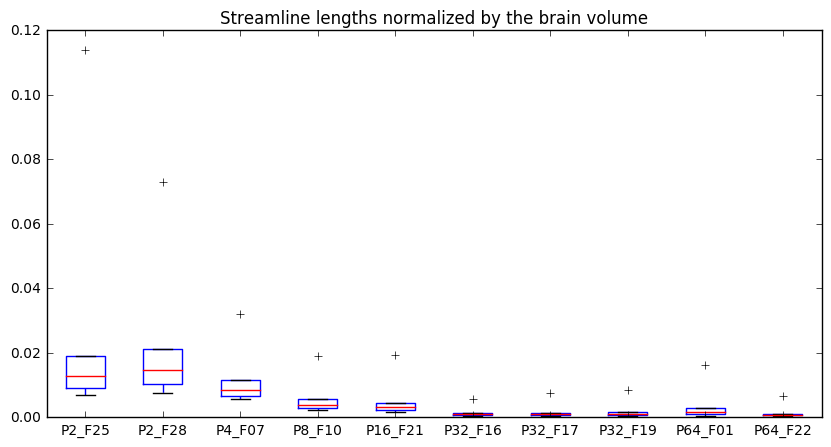

In [220]:
plt.figure(figsize=(10,5))
plt.boxplot(nplsquartiles.T,labels=subjs)
plt.title('Streamline lengths normalized by the brain volume')
plt.show()

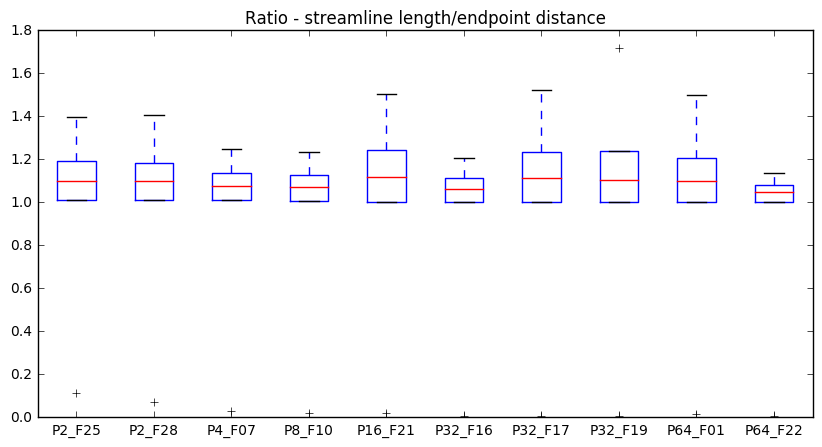

In [221]:
nprsquartiles = computeQuartiles(rs)

plt.figure(figsize=(10,5))
plt.boxplot(nprsquartiles.T,labels=subjs)
#plt.xlabel(subjs)
plt.title('Ratio - streamline length/endpoint distance')
plt.show()

In [8]:
#save small tractogram
dDesktop = '/Users/ghfc/Desktop/'
fnew_tractogram = dDesktop + subj+'_streamline'+str(stNb)+'.trk'
save_trk_old_style(fnew_tractogram, streamlines[stNb:stNb+1], affine, fa.shape)